## Unequal Narratives? Investigating Media Bias in the Israel-Palestine Conflict

Subtopics:
1. Sentiment Analysis and Keyword Frequency of Headlines
2. Event Salience: Coverage vs. Casualties
3. Comparative Outlet Ideology

### Installation of requirements. 

The following cell contains all the necessary dependencies needed for this project.

Here we can add every dependency needed and describe it:
* [`pandas`](https://pandas.pydata.org/docs/index.html) is a Python package for creating and working with tabular data. [Here](https://pandas.pydata.org/docs/reference/index.html) is the documentation of `pandas`.
* [`numpy`](https://numpy.org/) is a Python package for mathematical functions. [Here](https://numpy.org/doc/stable/reference/index.html) is the documentation of `numpy`.
* [`matplotlib`](https://matplotlib.org/) is a Python package for creating plots. [Here](https://matplotlib.org/stable/api/index.html) is the documentation of `matplotlib`.
* [`scikit-learn`](https://scikit-learn.org/stable/) is a Python package with different machinelearning algorithms. [Here](https://scikit-learn.org/stable/modules/classes.html) is the documentation of `sklearn`.

In [1]:
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install scikit-learn
! pip install seaborn
! pip install nltk vaderSentiment transformers
! pip install torch transformers

  Using cached torch-2.5.1-cp312-cp312-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvi

### Import requirements
The cell below imports all necessary dependancies.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from transformers import pipeline
import numpy as np
from sklearn.linear_model import LinearRegression

/home/tina/Schreibtisch/CSS/1.Semester/FCSS/FCSS-Project-Group-10/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Preparation and Preprocessing

### Data cleaning from the file from Media Cloud (https://search.mediacloud.org/). 

Details about the date enter here.


In [3]:
file_path = "data.csv"
data = pd.read_csv(file_path)

Filtering by keywords: We check if the title column contains any of the needed words, ignoring case sensitivity and handling missing values.

In [11]:
keywords = ["Gaza", "Israel", "Palestine", "West Bank", "Palestinian", "Hamas", "IDF", "Hezbollah"]
data_filtered = data[data['title'].str.contains('|'.join(keywords), case=False, na=False)]

# Drop the 'id' and 'language' columns
data_cleaned = data_filtered.drop(columns=['id', 'indexed_date', 'language', 'media_url', 'url'])

data_cleaned = data_cleaned.rename(columns={
    "media_name": "Media Name",
    "publish_date": "Publish Date",
    "title": "Title",
})

cleaned_file_path = "data_cleaned_filtered.csv"
data_cleaned.to_csv(cleaned_file_path, index=False)

data_cleaned

,Media Name,Publish Date,Title
2,foxnews.com,2024-10-07,Hezbollah rocket attack on Israel hits Haifa f...
4,cnn.com,2024-10-07,Israeli Amb: ‘We will not heal’ until hostages...
6,cnn.com,2024-10-07,Family member of Israeli hostages: ‘We never l...
7,nypost.com,2024-10-07,Israel establishes new military zone around Le...
10,nypost.com,2024-10-07,Oct. 7 anniversary live updates: Thousands of ...
...,...,...,...
25258,nytimes.com,2023-10-07,‘The Children Were Terrified.’ Fear Grips Isra...
25261,washingtonpost.com,2023-10-07,This is Israel’s 9/11. The consequences will b...
25262,nytimes.com,2023-10-07,Israel’s defense failures may change strategy ...
25263,nytimes.com,2023-10-07,Gaza Has Suffered Under 16-Year Blockade


### Analysis of Media Coverage
The bar chart below illustrates the number of posts published by six major US media outlets (CNN, NBC, NY Post, NY Times, Fox, and Wall Street Journal) related to Gaza, Israel, or Palestine during the selected timeframe. This analysis highlights variations in the volume of coverage among these outlets, offering insights into their reporting focus on the topic.

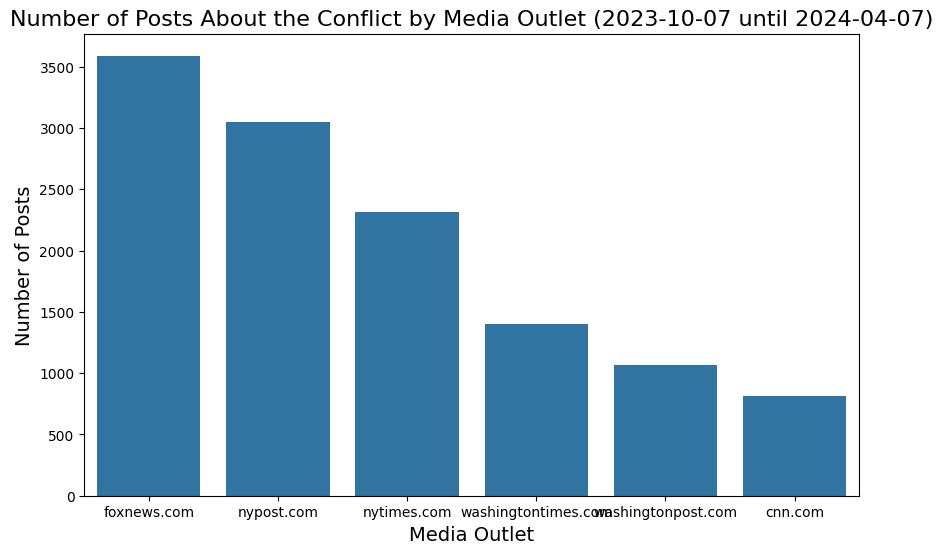

In [12]:
# Count the number of posts for each media outlet
media_counts = data_cleaned['Media Name'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=media_counts.index, y=media_counts.values)

plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.title("Number of Posts About the Conflict by Media Outlet (2023-10-07 until 2024-04-07)", fontsize=16)
plt.show()

## 1 Sentiment Analysis and Keyword Frequency of Headlines

### 1.1 


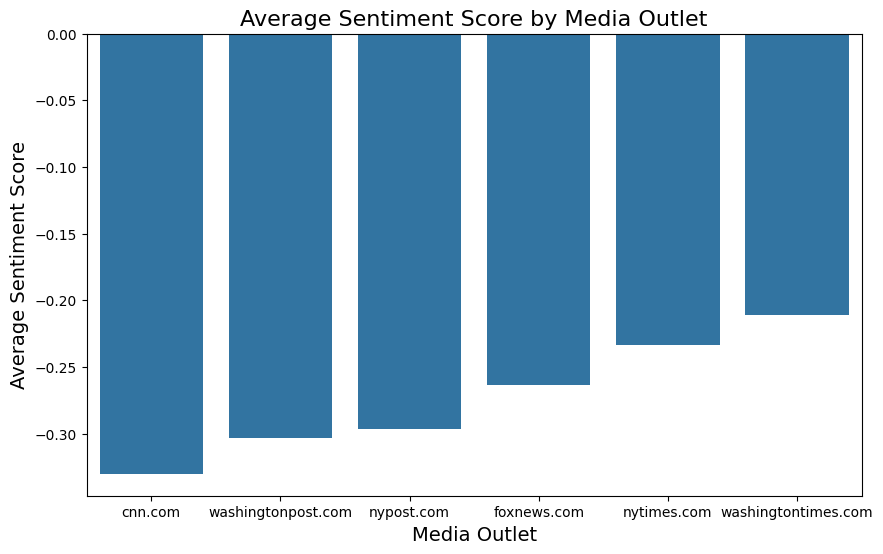

In [14]:
analyzer = SentimentIntensityAnalyzer()

data_cleaned['Sentiment Score'] = data_cleaned['Title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
data_cleaned

# Calculate average sentiment by media outlet
avg_sentiment_by_outlet = data_cleaned.groupby('Media Name')['Sentiment Score'].mean().sort_values()

# Plot average sentiment by outlet
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sentiment_by_outlet.index, y=avg_sentiment_by_outlet.values)
plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.title("Average Sentiment Score by Media Outlet", fontsize=16)
plt.show()

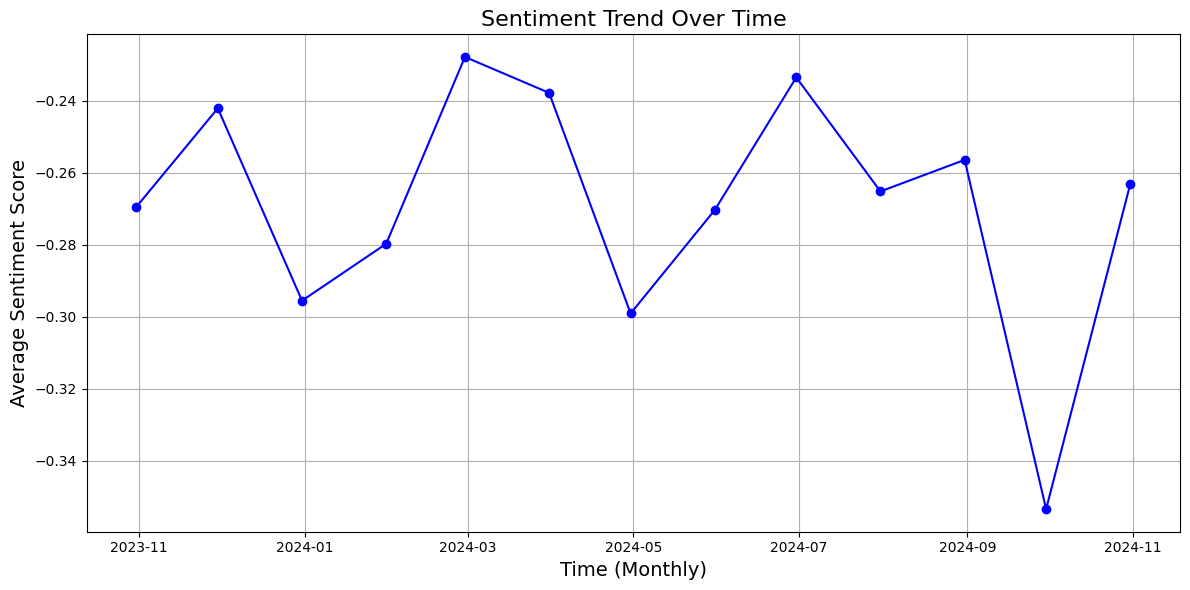

In [8]:
# Convert 'Publish Date' to datetime format
data_cleaned['Publish Date'] = pd.to_datetime(data_cleaned['Publish Date'])

# Calculate average sentiment score by month
sentiment_over_time = data_cleaned.resample('ME', on='Publish Date')['Sentiment Score'].mean()

# Plot sentiment over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time.index, sentiment_over_time.values, marker='o', color='blue')
plt.xlabel("Time (Monthly)", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)
plt.title("Sentiment Trend Over Time", fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

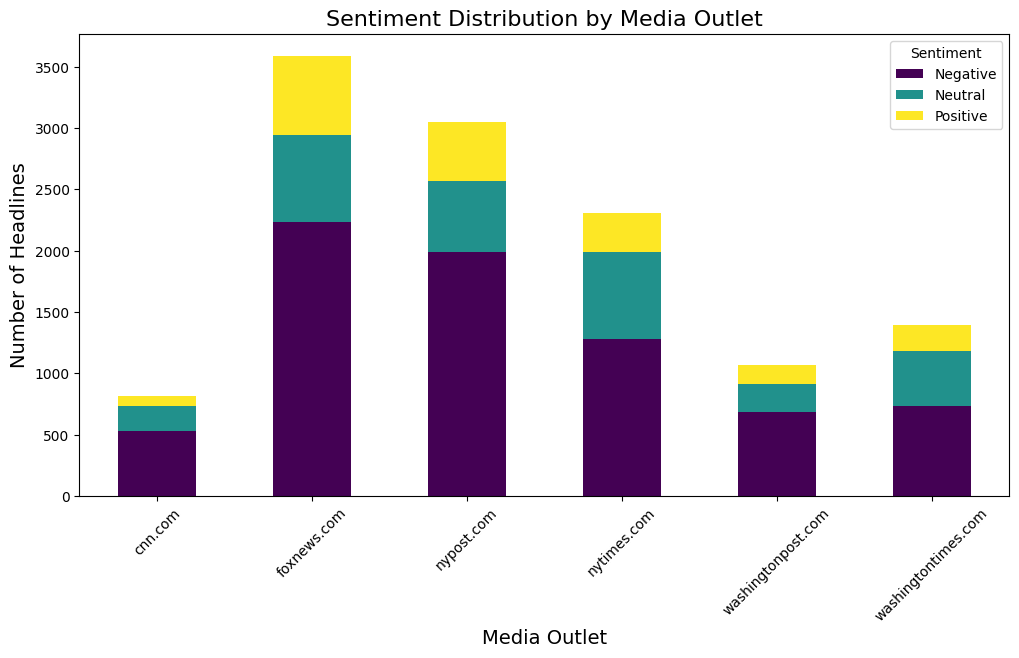

In [10]:
def classify_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

data_cleaned['Sentiment Label'] = data_cleaned['Sentiment Score'].apply(classify_sentiment)

#positive, neutral, and negative headlines by media outlet
sentiment_counts = data_cleaned.groupby(['Media Name', 'Sentiment Label']).size().unstack(fill_value=0)

sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

plt.xlabel("Media Outlet", fontsize=14)
plt.ylabel("Number of Headlines", fontsize=14)
plt.title("Sentiment Distribution by Media Outlet", fontsize=16)
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()


## 2 Event Salience: Coverage vs. Casualties

### 2.1

## 3 Comparative Outlet Ideology

### 3.1